<p style="font-family: Times New Roman; font-size:3.75em;color:black; font-style:bold"><br>
Project B, Linear Regression and Classification </p><br>

By: Peter Oh (jo299), Magd Bayoumi (mb2363), Eric Ma (exm4)

# Importing necessary modules

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

path_to_train_data = "./train.csv"

In [2]:
df = pd.read_csv(path_to_train_data)

print('Number of houses:', format(df.shape[0]))
print ('Number of features:', format(df.shape[1]-2))


Number of houses: 1460
Number of features: 79


# Filling in NA Values

In [3]:
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
df.Alley.fillna("None",inplace=True)

In [4]:
df.MasVnrType.fillna("None",inplace=True)
df.MasVnrArea.fillna(0.0, inplace=True)

In [5]:
df.BsmtQual.fillna("None",inplace=True)
df.BsmtCond.fillna("None",inplace=True)
df.BsmtExposure.fillna("None",inplace=True)

In [6]:
df.BsmtFinType1.fillna("None",inplace=True)
df.BsmtFinType2.fillna("None",inplace=True)

In [7]:
df.Electrical.fillna("SBrkr",inplace=True)

In [8]:
df.FireplaceQu.fillna("None",inplace=True)

In [9]:
df.GarageType.fillna("None",inplace=True)
df.GarageYrBlt.fillna("None",inplace=True)
df.GarageFinish.fillna("None",inplace=True)
df.GarageQual.fillna("None",inplace=True)
df.GarageCond.fillna("None",inplace=True)

In [10]:
df.PoolQC.fillna("None",inplace=True)

In [11]:
df.Fence.fillna("None",inplace=True)

In [12]:
df.MiscFeature.fillna("None",inplace=True)

In [13]:
null_cols = df.columns[df.isnull().any()]
print(null_cols)
df[null_cols].isnull().sum()

Index([], dtype='object')


Series([], dtype: float64)

# Mapping Numerical Values to Categorical Values

In [14]:
print ('ExterQual:    {0}'.format(df['ExterQual'].unique()))
print ('ExterCond:    {0}'.format(df['ExterCond'].unique()))
print ('BsmtQual:     {0}'.format(df['BsmtQual'].unique()))
print ('BsmtCond:     {0}'.format(df['BsmtCond'].unique()))
print ('HeatingQC:    {0}'.format(df['HeatingQC'].unique()))
print ('KitchenQual:  {0}'.format(df['KitchenQual'].unique()))
print ('FireplaceQu:  {0}'.format(df['FireplaceQu'].unique()))
print ('GarageQual:   {0}'.format(df['GarageQual'].unique()))
print ('GarageCond:   {0}'.format(df['GarageCond'].unique()))
print ('PoolQC:       {0}'.format(df['PoolQC'].unique()))
print ('\n')
print ('BsmtExposure: {0}'.format(df['BsmtExposure'].unique()))
print ('BsmtFinType1: {0}'.format(df['BsmtFinType1'].unique()))
print ('BsmtFinType2: {0}'.format(df['BsmtFinType2'].unique()))
print ('Functional:   {0}'.format(df['Functional'].unique()))
print ('GarageFinish: {0}'.format(df['GarageFinish'].unique()))
print ('Fence:        {0}'.format(df['Fence'].unique()))

ExterQual:    ['Gd' 'TA' 'Ex' 'Fa']
ExterCond:    ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual:     ['Gd' 'TA' 'Ex' 'None' 'Fa']
BsmtCond:     ['TA' 'Gd' 'None' 'Fa' 'Po']
HeatingQC:    ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual:  ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu:  ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageQual:   ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
GarageCond:   ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
PoolQC:       ['None' 'Ex' 'Fa' 'Gd']


BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
BsmtFinType2: ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
Functional:   ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
GarageFinish: ['RFn' 'Unf' 'Fin' 'None']
Fence:        ['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [15]:
quality_dictionary = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['ExterQual']   = df['ExterQual'].map(quality_dictionary).astype(int)
df['ExterCond']   = df['ExterCond'].map(quality_dictionary).astype(int)
df['BsmtQual']    = df['BsmtQual'].map(quality_dictionary).astype(int)
df['BsmtCond']    = df['BsmtCond'].map(quality_dictionary).astype(int)
df['HeatingQC']   = df['HeatingQC'].map(quality_dictionary).astype(int)
df['KitchenQual'] = df['KitchenQual'].map(quality_dictionary).astype(int)
df['FireplaceQu'] = df['FireplaceQu'].map(quality_dictionary).astype(int)
df['GarageQual']  = df['GarageQual'].map(quality_dictionary).astype(int)
df['GarageCond']  = df['GarageCond'].map(quality_dictionary).astype(int)
df['PoolQC']      = df['PoolQC'].map(quality_dictionary).astype(int)

#saving memory
del quality_dictionary

In [16]:
df['BsmtExposure'] = df['BsmtExposure'].map({'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}).astype(int)

bsmtdict = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmtdict).astype(int)
df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmtdict).astype(int)

df['Functional'] = df['Functional'].map({'None': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 
                                         'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}).astype(int)

df['GarageFinish'] = df['GarageFinish'].map({'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}).astype(int)
df['Fence'] = df['Fence'].map({'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}).astype(int)

del bsmtdict

# Understanding Correlation between Features

In [17]:
dfcorr = df.corr()
dfcorr = dfcorr['SalePrice']

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df.corr(), 20))

#print(dfcorr)
df.corr()

Top Absolute Correlations
GarageQual    GarageCond      0.998768
PoolArea      PoolQC          0.994259
GarageCars    GarageArea      0.988244
ExterQual     KitchenQual     0.970237
Fireplaces    FireplaceQu     0.967941
OverallQual   SalePrice       0.967327
              ExterQual       0.964200
BsmtFinType2  BsmtFinSF2      0.956578
GrLivArea     TotRmsAbvGrd    0.947504
OverallQual   KitchenQual     0.947185
TotalBsmtSF   1stFlrSF        0.939843
ExterQual     SalePrice       0.924657
YearRemodAdd  KitchenQual     0.924206
KitchenQual   SalePrice       0.915048
GarageFinish  GarageCars      0.913889
YearRemodAdd  ExterQual       0.912896
YearBuilt     GarageFinish    0.909283
YearRemodAdd  HeatingQC       0.908748
YearBuilt     ExterQual       0.906710
BsmtFinType1  BsmtFinSF1      0.904124
dtype: float64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,0.005039,...,0.002889,-0.046635,0.001330,0.057044,0.047655,-0.006632,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,0.016178,...,-0.012037,-0.043825,-0.026030,0.008283,0.014198,-0.084980,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.165567,...,0.010287,0.061945,0.037655,0.180819,0.231562,0.030550,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.055570,...,-0.018340,0.020423,0.043160,0.077672,0.091727,-0.041423,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.726278,...,-0.113937,0.030371,0.064886,0.065166,0.083690,-0.152253,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.138942,...,0.070356,0.025504,0.054811,-0.001985,-0.013646,0.169653,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.598160,...,-0.387268,0.031355,-0.050364,0.004950,0.002113,-0.212545,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.587318,...,-0.193919,0.045286,-0.038740,0.005829,0.010059,-0.141096,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.345329,...,-0.109907,0.019144,0.062248,0.011928,0.015073,-0.096786,-0.029512,-0.006723,-0.008317,0.472614
ExterQual,0.005039,0.016178,0.165567,0.055570,0.726278,-0.138942,0.598160,0.587318,0.345329,1.000000,...,-0.149589,0.036934,0.012688,0.034766,0.051950,-0.233852,-0.039310,0.042790,-0.006745,0.682639


## Correlation of Sale Price for Linear Regression

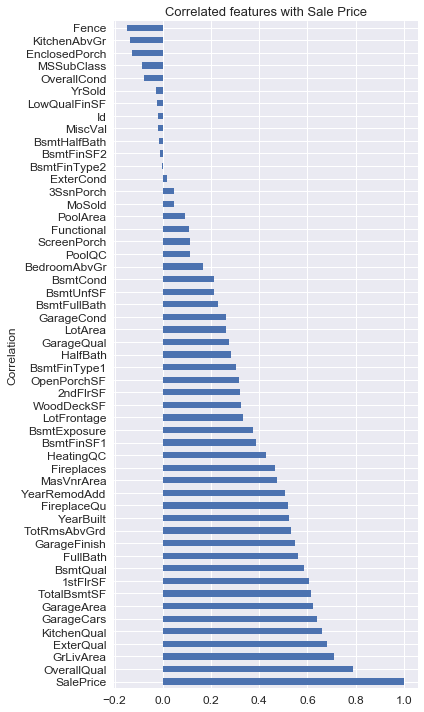

In [18]:
corr_sale=df.corr()["SalePrice"]

fig, ax = plt.subplots(figsize = (6, 10))
corr_sale[np.argsort(corr_sale, axis=0)[::-1]].plot(kind='barh')
plt.tick_params(labelsize=12)
plt.ylabel("Correlation",size=12)
plt.title('Correlated features with Sale Price', size=13)
plt.tight_layout()

del corr_sale

Based on this, we should use Overall Quality, GrLivArea, ExterQual, KitchenQual, and GarageArea/GarageCars for the SalePrice linear model.

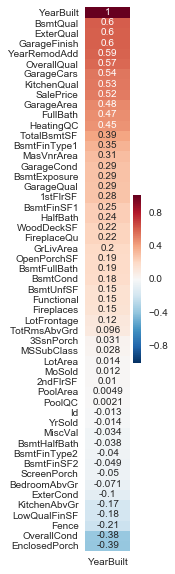

In [19]:
corrmat = df.corr()
indices = corrmat.loc['YearBuilt'].copy()
a = pd.DataFrame(indices.sort_values(ascending=False))
plt.figure(figsize=(1,10))
sns.heatmap(a, annot=True)

For the kNN model, we can use BsmtQual, ExterQual, GarageFinish, OverallQual, and YearRemodAdd against the YearBuilt

# Linear Regression Model

### Split 1

In [1]:
model = LinearRegression()

X = df[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

model = model.fit(X=X_train, y=y_train)

predictions = model.predict(X=X_test)

RMSE = np.sqrt(mean_squared_error(y_true = y_test, y_pred=predictions))

baseline = np.zeros(482)+180921.195890

RMSE_Baseline = np.sqrt(mean_squared_error(y_true = y_test, y_pred=baseline))


NameError: name 'LinearRegression' is not defined

In [ ]:
if (0.6*RMSE_Baseline) > RMSE:
    print("Relative Accuracy of our Model: {}".format(1-(RMSE/RMSE_Baseline)))
    print(RMSE)

### Split 2

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

model = model.fit(X=X_train, y=y_train)

predictions = model.predict(X=X_test)

RMSE = np.sqrt(mean_squared_error(y_true = y_test, y_pred=predictions))

baseline = np.zeros(482)+180921.195890

RMSE_Baseline = np.sqrt(mean_squared_error(y_true = y_test, y_pred=baseline))

In [23]:
if (0.6*RMSE_Baseline) > RMSE:
    print("Relative Accuracy of our Model: {}".format(1-(RMSE/RMSE_Baseline)))

Relative Accuracy of our Model: 0.5336050029932292


### Split 3

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=60)

model = model.fit(X=X_train, y=y_train)

predictions = model.predict(X=X_test)

RMSE = np.sqrt(mean_squared_error(y_true = y_test, y_pred=predictions))

baseline = np.zeros(482)+180921.195890

RMSE_Baseline = np.sqrt(mean_squared_error(y_true = y_test, y_pred=baseline))

In [25]:
if (0.6*RMSE_Baseline) > RMSE:
    print("Relative Accuracy of our Model: {}".format(1-(RMSE/RMSE_Baseline)))

Relative Accuracy of our Model: 0.47150890996069283


### Split 4

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

model = model.fit(X=X_train, y=y_train)

predictions = model.predict(X=X_test)

RMSE = np.sqrt(mean_squared_error(y_true = y_test, y_pred=predictions))

baseline = np.zeros(482)+180921.195890

RMSE_Baseline = np.sqrt(mean_squared_error(y_true = y_test, y_pred=baseline))

In [27]:
if (0.6*RMSE_Baseline) > RMSE:
    print("Relative Accuracy of our Model: {}".format(1-(RMSE/RMSE_Baseline)))

Relative Accuracy of our Model: 0.46344713492432255


### Split 5

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = model.fit(X=X_train, y=y_train)

predictions = model.predict(X=X_test)

RMSE = np.sqrt(mean_squared_error(y_true = y_test, y_pred=predictions))

baseline = np.zeros(482)+180921.195890

RMSE_Baseline = np.sqrt(mean_squared_error(y_true = y_test, y_pred=baseline))

In [44]:
if (0.6*RMSE_Baseline) > RMSE:
    print("Relative Accuracy of our Model: {}".format(1-(RMSE/RMSE_Baseline)))

Relative Accuracy of our Model: 0.535326174237118


### For loop to test 5000 seeds

In [48]:
loopres = []
for i in range(5000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    model = model.fit(X=X_train, y=y_train)
    predictions = model.predict(X=X_test)
    Si_RMSE = np.sqrt(mean_squared_error(y_true = y_test, y_pred=predictions))
    loopres.append(Si_RMSE)
    
if (0.6*RMSE_Baseline) > max(loopres):
    print("All 5000 seeds passed.")
else:
    print(1 - (max(loopres)/RMSE_Baseline), loopres.index(max(loopres)))

All 5000 seeds passed.


In [46]:
for n in loopres:
     if 0.6 <= n/RMSE_Baseline:
         print("Hello")

# kNN 

### Split 1

In [32]:
df['1970'] = df['YearBuilt']

for i in range(df['YearBuilt'].count()):
    #print(df['YearBuilt'][i],type(df['YearBuilt'][i]))
    if df['1970'][i] >= 1970:
        df['1970'][i] = 1
    else:
        df['1970'][i] = 0

In [33]:
X = df[['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']]
y = df['1970']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=90)
#type(X_train)

In [34]:
cols = ['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']
cols2 = ['1970']
trainArr = X_train.as_matrix(cols)
trainRes = y_train.as_matrix()
testArr = X_test.as_matrix(cols)
testRes = y_test.as_matrix()
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(trainArr, trainRes)
output = knn.predict(testArr)
# or predict on a specific example!
print(testArr[0])
print(knn.predict(testArr[0]))
print(testRes[0])
print(testRes)

[   3    3    2    5 2002]
[0]
0
[0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1
 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1
 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0
 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1
 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 

K with Highest Accuracy: 3


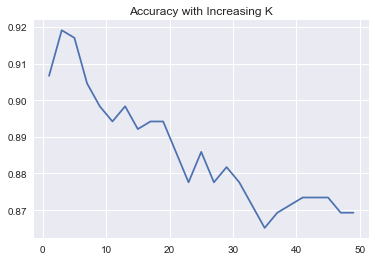

In [35]:
results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(trainArr, trainRes)
    preds = clf.predict(testArr)
    accuracy = np.where(preds==testRes, 1, 0).sum() / float(len(testRes))
    #print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))

    results.append([n, accuracy])
print("K with Highest Accuracy: {}".format(max(results[1])))
results = pd.DataFrame(results, columns=["n", "accuracy"])

plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

Baseline Accuracy

In [36]:
correct2 = 0.0
for i in range(len(output)): 
    if 1 == output[i]: 
        correct2 += 1
correct2 / len(output)

0.5352697095435685

Model Accuracy

In [37]:
correct = 0.0
for i in range(len(output)): 
    if testRes[i] == output[i]: 
        correct += 1
correct / len(output)

0.91701244813278

### Split 2

In [38]:
df['1970'] = df['YearBuilt']

for i in range(df['YearBuilt'].count()):
    #print(df['YearBuilt'][i],type(df['YearBuilt'][i]))
    if df['1970'][i] >= 1970:
        df['1970'][i] = 1
    else:
        df['1970'][i] = 0

In [39]:
X = df[['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']]
y = df['1970']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=73)
#type(X_train)

In [40]:
cols = ['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']
cols2 = ['1970']
trainArr = X_train.as_matrix(cols)
trainRes = y_train.as_matrix()
testArr = X_test.as_matrix(cols)
testRes = y_test.as_matrix()
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(trainArr, trainRes)
output = knn.predict(testArr)
# or predict on a specific example!
print(testArr[0])
print(knn.predict(testArr[0]))
print(testRes[0])
print(testRes)

[   3    4    0    5 1974]
[1]
1
[1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1
 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 

K with Highest Accuracy: 3


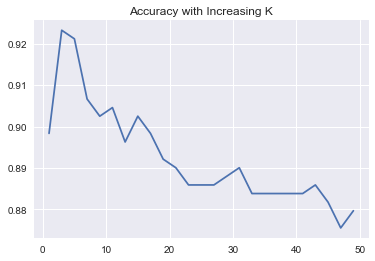

In [41]:
results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(trainArr, trainRes)
    preds = clf.predict(testArr)
    accuracy = np.where(preds==testRes, 1, 0).sum() / float(len(testRes))
    #print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))

    results.append([n, accuracy])
print("K with Highest Accuracy: {}".format(max(results[1])))
results = pd.DataFrame(results, columns=["n", "accuracy"])

plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

Baseline Accuracy

In [42]:
correct2 = 0.0
for i in range(len(output)): 
    if 1 == output[i]: 
        correct2 += 1
correct2 / len(output)

0.5622406639004149

Model Accuracy

In [43]:
correct = 0.0
for i in range(len(output)): 
    if testRes[i] == output[i]: 
        correct += 1
correct / len(output)

0.91701244813278

### Split 3

In [44]:
df['1970'] = df['YearBuilt']

for i in range(df['YearBuilt'].count()):
    #print(df['YearBuilt'][i],type(df['YearBuilt'][i]))
    if df['1970'][i] >= 1970:
        df['1970'][i] = 1
    else:
        df['1970'][i] = 0

In [45]:
X = df[['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']]
y = df['1970']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=28)
#type(X_train)

In [46]:
cols = ['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']
cols2 = ['1970']
trainArr = X_train.as_matrix(cols)
trainRes = y_train.as_matrix()
testArr = X_test.as_matrix(cols)
testRes = y_test.as_matrix()
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(trainArr, trainRes)
output = knn.predict(testArr)
# or predict on a specific example!
print(testArr[0])
print(knn.predict(testArr[0]))
print(testRes[0])
print(testRes)

[   5    4    3    9 2006]
[1]
1
[1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0
 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0
 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0
 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 

K with Highest Accuracy: 3


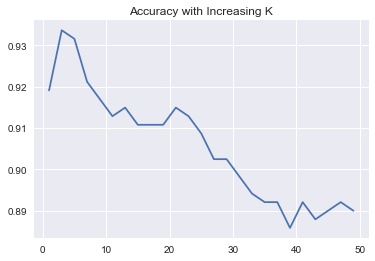

In [47]:
results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(trainArr, trainRes)
    preds = clf.predict(testArr)
    accuracy = np.where(preds==testRes, 1, 0).sum() / float(len(testRes))
    #print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))

    results.append([n, accuracy])
print("K with Highest Accuracy: {}".format(max(results[1])))
results = pd.DataFrame(results, columns=["n", "accuracy"])

plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

Baseline Accuracy

In [48]:
correct2 = 0.0
for i in range(len(output)): 
    if 1 == output[i]: 
        correct2 += 1
correct2 / len(output)

0.5726141078838174

Model Accuracy

In [ ]:
correct = 0.0
for i in range(len(output)): 
    if testRes[i] == output[i]: 
        correct += 1
correct / len(output)

0.9232365145228216

### Split 4

In [ ]:
df['1970'] = df['YearBuilt']

for i in range(df['YearBuilt'].count()):
    #print(df['YearBuilt'][i],type(df['YearBuilt'][i]))
    if df['1970'][i] >= 1970:
        df['1970'][i] = 1
    else:
        df['1970'][i] = 0

In [ ]:
X = df[['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']]
y = df['1970']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)
#type(X_train)

In [ ]:
cols = ['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']
cols2 = ['1970']
trainArr = X_train.as_matrix(cols)
trainRes = y_train.as_matrix()
testArr = X_test.as_matrix(cols)
testRes = y_test.as_matrix()
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(trainArr, trainRes)
output = knn.predict(testArr)
# or predict on a specific example!
print(testArr[0])
print(knn.predict(testArr[0]))
print(testRes[0])
print(testRes)

In [ ]:
results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(trainArr, trainRes)
    preds = clf.predict(testArr)
    accuracy = np.where(preds==testRes, 1, 0).sum() / float(len(testRes))
    #print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))

    results.append([n, accuracy])
print("K with Highest Accuracy: {}".format(max(results[1])))
results = pd.DataFrame(results, columns=["n", "accuracy"])

plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

Baseline Accuracy

In [ ]:
correct2 = 0.0
for i in range(len(output)): 
    if 1 == output[i]: 
        correct2 += 1
correct2 / len(output)

Model Accuracy

In [ ]:
correct = 0.0
for i in range(len(output)): 
    if testRes[i] == output[i]: 
        correct += 1
correct / len(output)

### Split 5

In [ ]:
df['1970'] = df['YearBuilt']

for i in range(df['YearBuilt'].count()):
    #print(df['YearBuilt'][i],type(df['YearBuilt'][i]))
    if df['1970'][i] >= 1970:
        df['1970'][i] = 1
    else:
        df['1970'][i] = 0

In [ ]:
X = df[['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']]
y = df['1970']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#type(X_train)

In [ ]:
cols = ['ExterQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'YearRemodAdd']
cols2 = ['1970']
trainArr = X_train.as_matrix(cols)
trainRes = y_train.as_matrix()
testArr = X_test.as_matrix(cols)
testRes = y_test.as_matrix()
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(trainArr, trainRes)
output = knn.predict(testArr)
# or predict on a specific example!
print(testArr[0])
print(knn.predict(testArr[0]))
print(testRes[0])
print(testRes)

In [ ]:
results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(trainArr, trainRes)
    preds = clf.predict(testArr)
    accuracy = np.where(preds==testRes, 1, 0).sum() / float(len(testRes))
    #print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))

    results.append([n, accuracy])
print("K with Highest Accuracy: {}".format(max(results[1])))
results = pd.DataFrame(results, columns=["n", "accuracy"])

plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

Baseline Accuracy

In [ ]:
correct2 = 0.0
for i in range(len(output)): 
    if 1 == output[i]: 
        correct2 += 1
correct2 / len(output)

Model Accuracy

In [ ]:
correct = 0.0
for i in range(len(output)): 
    if testRes[i] == output[i]: 
        correct += 1
correct / len(output)

### Confusion Matrix, Precisison, Recall (Optional) 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testRes, output)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
precision1, recall1, f11, support1 = precision_recall_fscore_support(testRes, output)#, average='macro')

print('precision: {}'.format(precision1))
print('recall: {}'.format(recall1))
print('fscore: {}'.format(f11))
print('support: {}'.format(support1))